In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy
from scipy.stats import entropy
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit

In [188]:
dataset_path_1st = 'data/1st_test/1st_test'
dataset_path_2nd = 'data/2nd_test/2nd_test'
dataset_path_3rd = 'data/3rd_test/4th_test/txt'

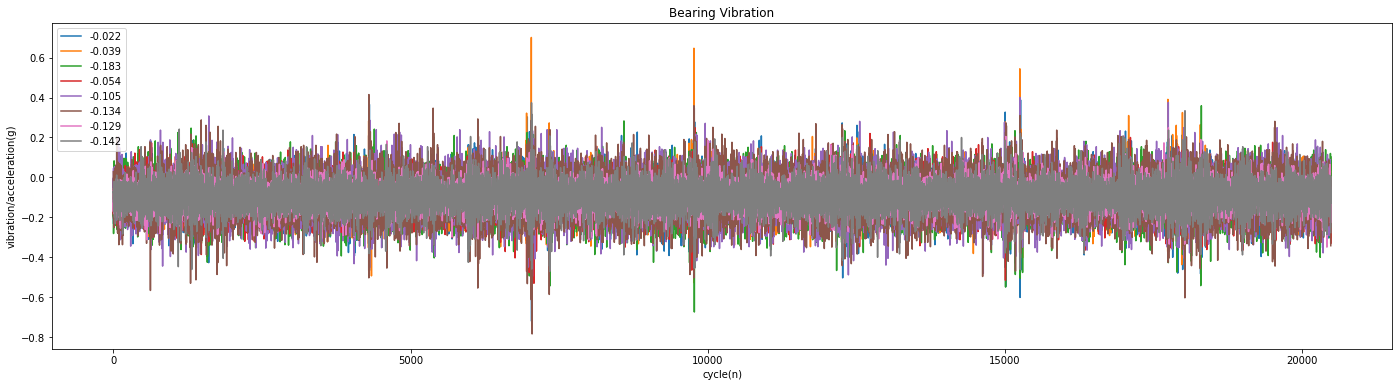

In [8]:
dataset = pd.read_csv(f'{dataset_path_1st}/2003.10.22.12.06.24', sep='\t')
ax = dataset.plot(figsize = (24,6), title= "Bearing Vibration" , legend = True)
ax.set(xlabel="cycle(n)", ylabel="vibration/acceleration(g)")
plt.show()

In [189]:
# Root Mean Squared Sum
def calculate_rms(df):
    result = []
    for col in df:
        r = np.sqrt((df[col]**2).sum() / len(df[col]))
        result.append(r)
    return result

# extract peak-to-peak features
def calculate_p2p(df):
    return np.array(df.max().abs() + df.min().abs())

# extract shannon entropy (cut signals to 500 bins)
def calculate_entropy(df):
    ent = []
    for col in df:
        ent.append(entropy(pd.cut(df[col], 500).value_counts()))
    return np.array(ent)
    
# extract clearence factor
def calculate_clearence(df):
    result = []
    for col in df:
        r = ((np.sqrt(df[col].abs())).sum() / len(df[col]))**2
        result.append(r)
    return result

def time_features(dataset_path, id_set=None):
    time_features = ['mean','std','skew','kurtosis','entropy','rms','max','p2p', 'crest', 'clearence', 'shape', 'impulse']
    cols1 = ['B1_x','B1_y','B2_x','B2_y','B3_x','B3_y','B4_x','B4_y']
    cols2 = ['B1','B2','B3','B4']
    
    # initialize
    if id_set == 1:
        columns = [c+'_'+tf for c in cols1 for tf in time_features]
        data = pd.DataFrame(columns=columns)
    else:
        columns = [c+'_'+tf for c in cols2 for tf in time_features]
        data = pd.DataFrame(columns=columns)

        
        
    for filename in os.listdir(dataset_path):
        # read dataset
        raw_data = pd.read_csv(os.path.join(dataset_path, filename), sep='\t')
        
        # time features
        mean_abs = np.array(raw_data.abs().mean())
        std = np.array(raw_data.std())
        skew = np.array(raw_data.skew())
        kurtosis = np.array(raw_data.kurtosis())
        entropy = calculate_entropy(raw_data)
        rms = np.array(calculate_rms(raw_data))
        max_abs = np.array(raw_data.abs().max())
        p2p = calculate_p2p(raw_data)
        crest = max_abs/rms
        clearence = np.array(calculate_clearence(raw_data))
        shape = rms / mean_abs
        impulse = max_abs / mean_abs
        
        if id_set == 1:
            mean_abs = pd.DataFrame(mean_abs.reshape(1,8), columns=[c+'_mean' for c in cols1])
            std = pd.DataFrame(std.reshape(1,8), columns=[c+'_std' for c in cols1])
            skew = pd.DataFrame(skew.reshape(1,8), columns=[c+'_skew' for c in cols1])
            kurtosis = pd.DataFrame(kurtosis.reshape(1,8), columns=[c+'_kurtosis' for c in cols1])
            entropy = pd.DataFrame(entropy.reshape(1,8), columns=[c+'_entropy' for c in cols1])
            rms = pd.DataFrame(rms.reshape(1,8), columns=[c+'_rms' for c in cols1])
            max_abs = pd.DataFrame(max_abs.reshape(1,8), columns=[c+'_max' for c in cols1])
            p2p = pd.DataFrame(p2p.reshape(1,8), columns=[c+'_p2p' for c in cols1])
            crest = pd.DataFrame(crest.reshape(1,8), columns=[c+'_crest' for c in cols1])
            clearence = pd.DataFrame(clearence.reshape(1,8), columns=[c+'_clearence' for c in cols1])
            shape = pd.DataFrame(shape.reshape(1,8), columns=[c+'_shape' for c in cols1])
            impulse = pd.DataFrame(impulse.reshape(1,8), columns=[c+'_impulse' for c in cols1])
            
        else:
            mean_abs = pd.DataFrame(mean_abs.reshape(1,4), columns=[c+'_mean' for c in cols2])
            std = pd.DataFrame(std.reshape(1,4), columns=[c+'_std' for c in cols2])
            skew = pd.DataFrame(skew.reshape(1,4), columns=[c+'_skew' for c in cols2])
            kurtosis = pd.DataFrame(kurtosis.reshape(1,4), columns=[c+'_kurtosis' for c in cols2])
            entropy = pd.DataFrame(entropy.reshape(1,4), columns=[c+'_entropy' for c in cols2])
            rms = pd.DataFrame(rms.reshape(1,4), columns=[c+'_rms' for c in cols2])
            max_abs = pd.DataFrame(max_abs.reshape(1,4), columns=[c+'_max' for c in cols2])
            p2p = pd.DataFrame(p2p.reshape(1,4), columns=[c+'_p2p' for c in cols2])
            crest = pd.DataFrame(crest.reshape(1,4), columns=[c+'_crest' for c in cols2])
            clearence = pd.DataFrame(clearence.reshape(1,4), columns=[c+'_clearence' for c in cols2])
            shape = pd.DataFrame(shape.reshape(1,4), columns=[c+'_shape' for c in cols2])
            impulse = pd.DataFrame(impulse.reshape(1,4), columns=[c+'_impulse' for c in cols2])
            
        # set index
        mean_abs.index = [filename]
        std.index = [filename]
        skew.index = [filename]
        kurtosis.index = [filename]
        entropy.index = [filename]
        rms.index = [filename]
        max_abs.index = [filename]
        p2p.index = [filename]
        crest.index = [filename]
        clearence.index = [filename]
        shape.index = [filename]
        impulse.index = [filename] 
        
        # concat
        merge = pd.concat([mean_abs, std, skew, kurtosis, entropy, rms, max_abs, p2p, crest, clearence, shape, impulse], axis=1)
        data = data.append(merge)
        
    if id_set == 1:
        cols = [c+'_'+tf for c in cols1 for tf in time_features]
        data = data[cols]
    else:
        cols = [c+'_'+tf for c in cols2 for tf in time_features]
        data = data[cols]
        
    data.index = pd.to_datetime(data.index, format='%Y.%m.%d.%H.%M.%S')
    data = data.sort_index()
    return data         

In [ ]:
# save dataset 1 in csv format
set1 = time_features(dataset_path_1st, id_set=1)
set1.to_csv('set1_timefeatures.csv')

In [7]:
set1 = pd.read_csv("./set1_timefeatures.csv")
set1 = set1.rename(columns={'Unnamed: 0':'time'})
last_cycle = int(len(set1))
print(set1.shape)

(2156, 97)


In [4]:
features = set1.copy()
#simple moving average SMA with window size 5
ma = pd.DataFrame()
ma['B4_x_mean'] = features['B4_x_mean']
ma['SMA'] = ma['B4_x_mean'].rolling(window=5).mean()
ma['time'] = features['time']

In [5]:
#Cumulative Moving Average with window size 10
ma['CMA'] = ma["B4_x_mean"].expanding(min_periods=10).mean()

In [6]:
#Exponantial Moving Average
ma['EMA'] = ma['B4_x_mean'].ewm(span=40,adjust=False).mean()

<AxesSubplot:xlabel='time'>

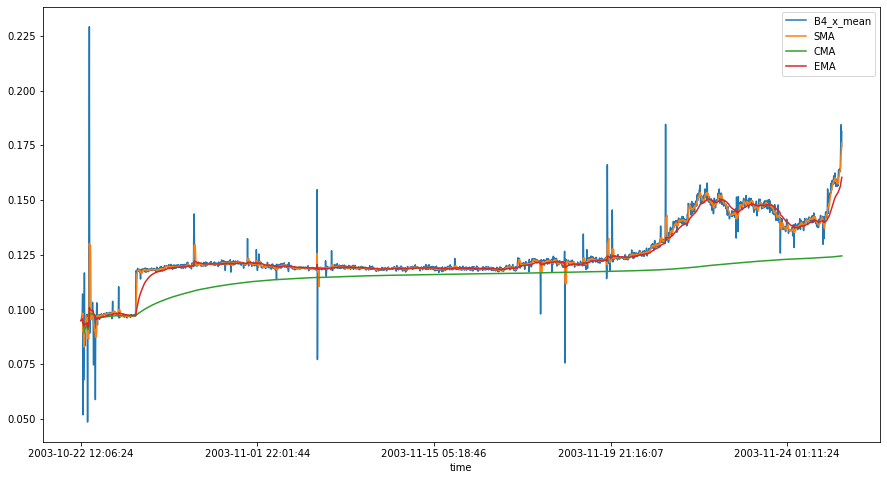

In [7]:
ma.plot(x="time", y= ['B4_x_mean','SMA','CMA','EMA'],figsize = (15,8))

In [5]:
def health_indicator(bearing_data,use_filter=False):    
    data = bearing_data.copy()
    if use_filter:
        for ft in data.columns:
            data[ft] = data[ft].ewm(span=40,adjust=False).mean()
    pca = PCA()
    X_pca = pca.fit_transform(data)
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    print("Explained variance of Pricincipal Component 1 is:"+str(pca.explained_variance_ratio_[0]))
    health_indicator = np.array(X_pca['PC1'])
    degredation = pd.DataFrame(health_indicator,columns=['PC1'])
    degredation['cycle'] = degredation.index
    degredation['PC1'] = degredation['PC1']-degredation['PC1'].min(axis=0)
    
    return degredation

def fit_exp(df,base=500,print_parameters=False):
    x =np.array(df.cycle)
    x = x[-base:].copy()
    y = np.array(degredation.PC1)
    y = y[-base:].copy()
    def exp_fit(x,a,b):
        y = a*np.exp(abs(b)*x)
        return y
    #initial parameters affect the result
    fit = curve_fit(exp_fit,x,y,p0=[0.01,0.001],maxfev=10000)
    if print_parameters:
        print(fit)
    return fit

def predict(X_df,p):
    x =np.array(X_df.cycle)
    a,b = p[0]
    fit_eq = a*np.exp(abs(b)*x)
    return fit_eq

In [22]:
#variable for incrementing index
prediction_cycle = 600
#variable for keeping intial value
init_cycle = prediction_cycle

In [23]:
# selected_features = ['mean','std','kurtosis','skew','entropy',
#        'rms','max','p2p','crest','shape','impulse']
selected_features = ['max','p2p','rms']

bearing = 3
B_x = ["B{}_x_".format(bearing)+i for i in selected_features]
early_cycles = set1[B_x][:init_cycle]
early_cycles_pca = health_indicator(early_cycles,use_filter=True)
print(early_cycles_pca)

Explained variance of Pricincipal Component 1 is:0.9955862512721826
          PC1  cycle
0    0.424070      0
1    0.415603      1
2    0.409489      2
3    0.409554      3
4    0.405303      4
..        ...    ...
595  0.051999    595
596  0.047614    596
597  0.054051    597
598  0.056413    598
599  0.060871    599

[600 rows x 2 columns]


Explained variance of Pricincipal Component 1 is:0.9955862512721826
0.05059810964384373 3.49854306299248e-11
failed at: 105100556904.92844


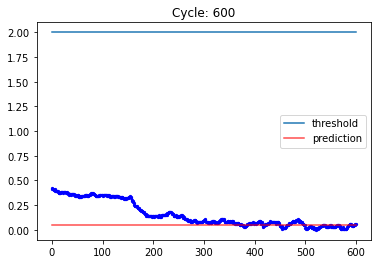

Explained variance of Pricincipal Component 1 is:0.9956274322666577
Explained variance of Pricincipal Component 1 is:0.994738878585239
Explained variance of Pricincipal Component 1 is:0.9944323438515958
Explained variance of Pricincipal Component 1 is:0.9945131999470982
0.0868044246628265 1.4417117860011925e-12
failed at: 2176055501702.195


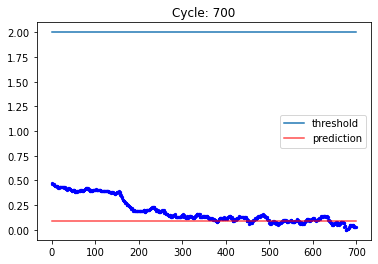

Explained variance of Pricincipal Component 1 is:0.9943348936040264
Explained variance of Pricincipal Component 1 is:0.994065675149865
Explained variance of Pricincipal Component 1 is:0.9941425509350195
Explained variance of Pricincipal Component 1 is:0.9942258600849837
0.0714346975903568 7.289917808242524e-12
failed at: 457085914442.0508


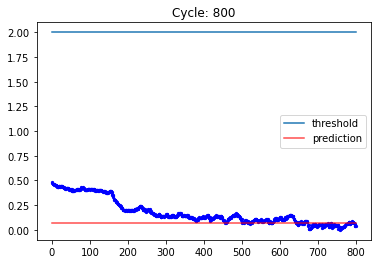

Explained variance of Pricincipal Component 1 is:0.994318212879631
Explained variance of Pricincipal Component 1 is:0.9944246593499706
Explained variance of Pricincipal Component 1 is:0.994553591035802
Explained variance of Pricincipal Component 1 is:0.9946231419277926
0.0794762156341711 4.932161170436525e-11
failed at: 65396173109.461876


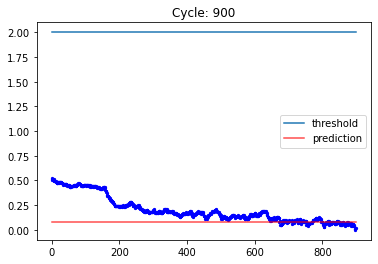

Explained variance of Pricincipal Component 1 is:0.9948198478976993
Explained variance of Pricincipal Component 1 is:0.9950259317353506
Explained variance of Pricincipal Component 1 is:0.9948466684734856
Explained variance of Pricincipal Component 1 is:0.995019274646456
0.15850751298047888 1.042924200113321e-11
failed at: 243076195428.67123


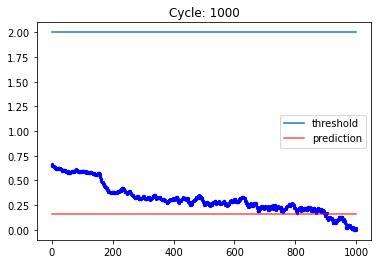

Explained variance of Pricincipal Component 1 is:0.9948511324202706
Explained variance of Pricincipal Component 1 is:0.9950169926804984
Explained variance of Pricincipal Component 1 is:0.9952193615868554
Explained variance of Pricincipal Component 1 is:0.9951984302556307
0.10830329970993426 4.6400510948045335e-11
failed at: 62843420862.94093


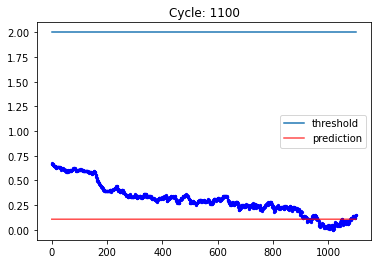

Explained variance of Pricincipal Component 1 is:0.9951053845217109
Explained variance of Pricincipal Component 1 is:0.9951897464631638
Explained variance of Pricincipal Component 1 is:0.9954286990005439
Explained variance of Pricincipal Component 1 is:0.9955899602744038
0.12986544379069181 -4.139342310483787e-12
failed at: 660588902241.0115


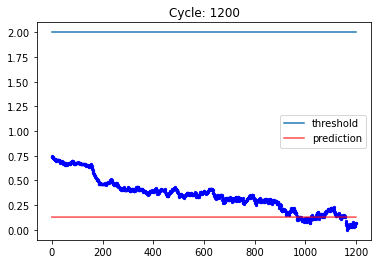

Explained variance of Pricincipal Component 1 is:0.9956944174532368
Explained variance of Pricincipal Component 1 is:0.9955628001810272
Explained variance of Pricincipal Component 1 is:0.9955539706656837
Explained variance of Pricincipal Component 1 is:0.9955892409489552
0.06701898756096625 -0.0006646957195198735
failed at: 5108.9940617053035


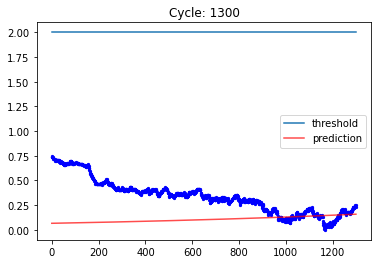

Explained variance of Pricincipal Component 1 is:0.9956128207836734
Explained variance of Pricincipal Component 1 is:0.9956577797932161
Explained variance of Pricincipal Component 1 is:0.995641050206156
Explained variance of Pricincipal Component 1 is:0.9956969166426684
0.0025097733242547752 0.003240763624935737
failed at: 2061.46167777689


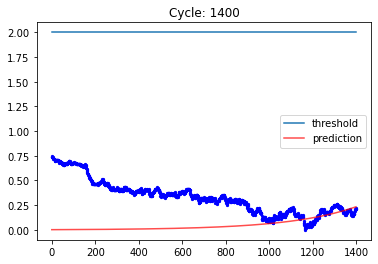

Explained variance of Pricincipal Component 1 is:0.9957357993870001
Explained variance of Pricincipal Component 1 is:0.9957709133694498
Explained variance of Pricincipal Component 1 is:0.9957551456075702
Explained variance of Pricincipal Component 1 is:0.995706710433732
0.18396807720293662 1.2830244095966323e-11
failed at: 185977771942.56995


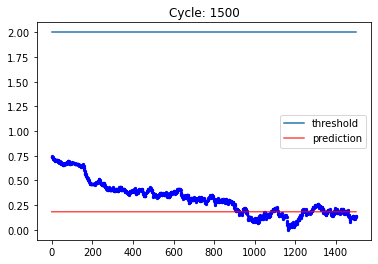

Explained variance of Pricincipal Component 1 is:0.9957134357814782
Explained variance of Pricincipal Component 1 is:0.9958235049868295
Explained variance of Pricincipal Component 1 is:0.9959215731490659
Explained variance of Pricincipal Component 1 is:0.9960260189647873
0.15534464139695472 2.5844732745683085e-11
failed at: 98869519881.8882


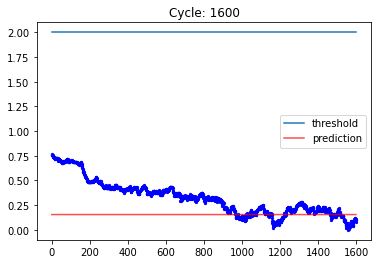

Explained variance of Pricincipal Component 1 is:0.9960897581128462
Explained variance of Pricincipal Component 1 is:0.9961591427113837
Explained variance of Pricincipal Component 1 is:0.9962161212912826
Explained variance of Pricincipal Component 1 is:0.9962515425160126
0.12338310907247729 -1.5450259223343686e-11
failed at: 180295242730.1921


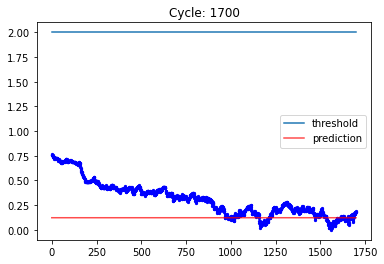

Explained variance of Pricincipal Component 1 is:0.9962641827358916
Explained variance of Pricincipal Component 1 is:0.9962825610152978
Explained variance of Pricincipal Component 1 is:0.9963388319181667
Explained variance of Pricincipal Component 1 is:0.9963345115234453
0.0006948375380354521 0.0031017483233299584
failed at: 2567.900051270604


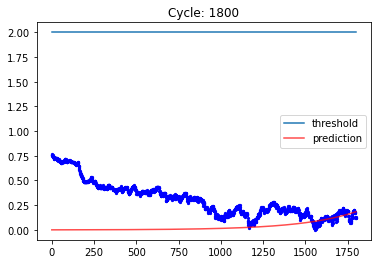

Explained variance of Pricincipal Component 1 is:0.9964219658348753
Explained variance of Pricincipal Component 1 is:0.9958652850773464
Explained variance of Pricincipal Component 1 is:0.9975708909365656
Explained variance of Pricincipal Component 1 is:0.9984235244672488
4.437748294707121e-09 0.010730968027214282
failed at: 1856.8936054975966


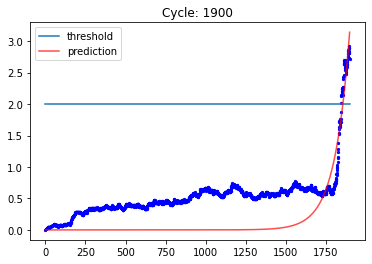

Explained variance of Pricincipal Component 1 is:0.9988442271438023
Explained variance of Pricincipal Component 1 is:0.9989920656412192
Explained variance of Pricincipal Component 1 is:0.9990413747503314
Explained variance of Pricincipal Component 1 is:0.9990896642794795
0.003078461883836001 0.0033889692875109386
failed at: 1911.0448712310817


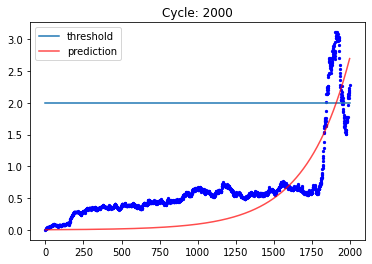

Explained variance of Pricincipal Component 1 is:0.999224376817439
Explained variance of Pricincipal Component 1 is:0.9993672946748798
Explained variance of Pricincipal Component 1 is:0.9994473749768741
Explained variance of Pricincipal Component 1 is:0.999440766843761
0.06146010840384836 0.001929472573766787
failed at: 1804.9047114627874


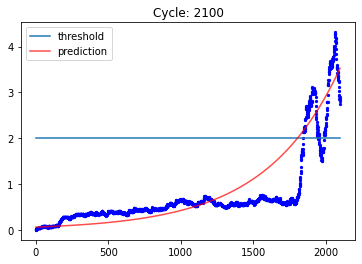

Explained variance of Pricincipal Component 1 is:0.9993638908821929
Explained variance of Pricincipal Component 1 is:0.9990647297727023


In [24]:
log = [[],[]]
#run this again, again to simulate life-cycle of a bearing
while prediction_cycle < len(set1)+1:
    data = set1[B_x][:prediction_cycle]
    ind=data.index
    degredation = health_indicator(data,use_filter=True)
    #degredation.plot(y='PC1',x='cycle')
    fit = fit_exp(degredation,base=250)

    prediction = predict(degredation,fit)
    m,n = fit[0]
    thres = 2
    #print(prediction_cycle)
    fail_cycle = (np.log(thres/m))/abs(n)
    log[0].append(prediction_cycle)
    log[1].append(fail_cycle)

    if prediction_cycle % 100 == 0:
        print(m,n)
        print('failed at: '+str(fail_cycle))

        fig =plt.figure('Cycle: '+str(prediction_cycle))
        ax =fig.subplots()

        ax.plot([0,prediction_cycle],[2,2])
        ax.scatter(degredation['cycle'],degredation['PC1'],color='b',s=5)
        ax.plot(degredation['cycle'],prediction,color='r',alpha=0.7)
        ax.set_title('Cycle: '+str(prediction_cycle))
        ax.legend(['threshold','prediction'])
        fig.savefig('output.png')
        plt.show()
    increment_cycle =25
    prediction_cycle += increment_cycle

In [234]:
#True labels represent Warnings!
d = {'time':set1['time'][init_cycle::increment_cycle],'cycle': log[0], 'prediction': (np.array(log[1]))}
df = pd.DataFrame(d)
df['isvalid'] = df['prediction']<2200
#adding real labels for analysing results
df['real'] = np.zeros(len(set1['time'][init_cycle::increment_cycle]))

for row in set1['time'][init_cycle::increment_cycle].index:
    if bearing == 1:
        if row<=151:
            df['real'][row] = 'early'
        if 151 < row <=600:
            df['real'][row] = "suspect"
        if 600 < row <=1499:
            df['real'][row] = "normal"
        if 1499 < row <=2098:
            df['real'][row] = "suspect"
        if 2098 < row <= 2200:
            df['real'][row] =("imminent_failure")
    if bearing == 2:
        if row<=500:
            df['real'][row] =("early")
        if 500 < row <=2000:
            df['real'][row] =("normal")
        if 2000 < row <=2120:
            df['real'][row] =("suspect")
        if 2120< row <=2200:
            df['real'][row] =("imminet_failure")

    if bearing == 3:
        if row<=500:
            df['real'][row] =("early")
        if 500 < row <= 1790:
            df['real'][row] =("normal")
        if 1790 < row <=2120:
            df['real'][row] =("suspect")
        if 2120 < row <=2200:
            df['real'][row] =("Inner_race_failure")
    if bearing == 4:
        if row<=200:
            df['real'][row] =("early")
        if 200 < row <=1000:
            df['real'][row] =("normal")
        if 1000 < row <= 1435:
            df['real'][row] =("suspect")
        if 1435 < row <=1840:
            df['real'][row] =("Inner_race_failure")
        if 1840 < row <=2200:
            df['real'][row] =("Stage_two_failure")

print(bearing)
print(df.tail(60))

3
                     time  cycle    prediction  isvalid                real
675   2003-11-09 00:51:44    675  5.838424e+10    False              normal
700   2003-11-09 05:01:44    700  2.176056e+12    False              normal
725   2003-11-09 09:05:58    725  8.225726e+10    False              normal
750   2003-11-09 13:15:58    750  3.365898e+11    False              normal
775   2003-11-09 17:25:58    775  1.629479e+11    False              normal
800   2003-11-10 01:05:58    800  4.570859e+11    False              normal
825   2003-11-10 05:15:58    825  4.899587e+11    False              normal
850   2003-11-10 09:25:58    850  6.040525e+11    False              normal
875   2003-11-10 13:35:58    875  3.525239e+11    False              normal
900   2003-11-14 12:12:17    900  6.539617e+10    False              normal
925   2003-11-14 16:22:17    925  7.683048e+10    False              normal
950   2003-11-14 20:58:46    950  1.392668e+11    False              normal
975   2003

C:\Users\PC\AppData\Local\Temp/ipykernel_4872/3082233458.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['real'][row] =("normal")
c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### dataset 2

In [ ]:
set2 = time_features(dataset_path_2nd, id_set=2)
set2.to_csv('set2_timefeatures.csv')

In [2]:
set2 = pd.read_csv("./set3_timefeatures.csv")
set2 = set2.rename(columns={'Unnamed: 0':'time'})
set2.head()

,time,B1_mean,B1_std,B1_skew,B1_kurtosis,B1_entropy,B1_rms,B1_max,B1_p2p,B1_crest,...,B4_skew,B4_kurtosis,B4_entropy,B4_rms,B4_max,B4_p2p,B4_crest,B4_clearence,B4_shape,B4_impulse
0,2004-03-04 09:27:46,0.061630,0.079632,0.030945,1.293219,4.797487,0.079770,0.569,1.116,7.133019,...,0.038762,0.560486,4.529537,0.055493,0.303,0.557,5.460149,0.036303,1.276447,6.969589
1,2004-03-04 09:32:46,0.060774,0.078513,-0.013895,1.157942,4.868368,0.078677,0.491,0.952,6.240741,...,0.013937,0.356269,4.487724,0.053352,0.249,0.461,4.667121,0.035253,1.269095,5.923021
2,2004-03-04 09:42:46,0.062195,0.079787,0.033416,0.890444,4.889695,0.079817,0.515,0.969,6.452262,...,0.034319,0.478659,4.480881,0.052704,0.278,0.556,5.274739,0.034633,1.274279,6.721489
3,2004-03-04 09:52:46,0.062994,0.081046,-0.027055,1.182243,4.834093,0.081084,0.552,1.072,6.807721,...,0.007334,0.342723,4.519586,0.054843,0.300,0.569,5.470193,0.036072,1.271674,6.956300
4,2004-03-04 10:02:46,0.061945,0.079128,-0.017849,0.586162,4.885535,0.079166,0.381,0.750,4.812653,...,0.023480,0.262501,4.505514,0.053912,0.247,0.474,4.581558,0.035797,1.265030,5.795806


In [3]:
#variable for incrementing index
prediction_cycle = 550
#variable for keeping intial value
init_cycle = prediction_cycle

In [6]:
selected_features = ['max','p2p']
bearing = 1
B_x = ["B{}_".format(bearing)+i for i in selected_features]
early_cycles = set2[B_x][:init_cycle]
early_cycles_pca = health_indicator(early_cycles,use_filter=True)

Explained variance of Pricincipal Component 1 is:0.9985263406207875


Explained variance of Pricincipal Component 1 is:0.9985263406207875
failed at765516077253.7246


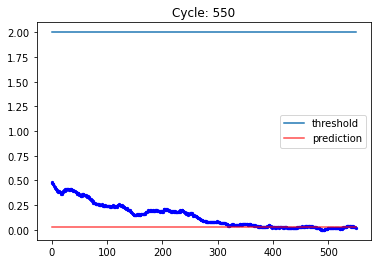

Explained variance of Pricincipal Component 1 is:0.998587059413731
Explained variance of Pricincipal Component 1 is:0.998514299863846
failed at3012809025.8854036


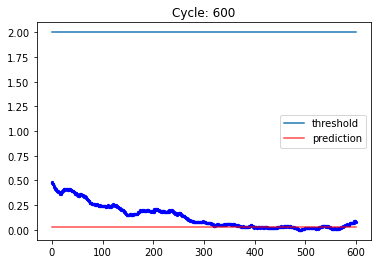

Explained variance of Pricincipal Component 1 is:0.998474361001603
Explained variance of Pricincipal Component 1 is:0.9984917888652428
failed at1072.0572483767016


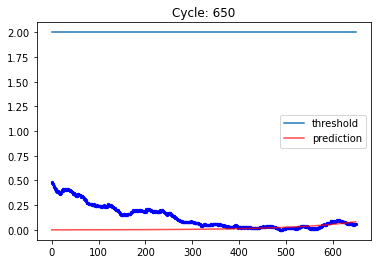

Explained variance of Pricincipal Component 1 is:0.9985081776823657
Explained variance of Pricincipal Component 1 is:0.9985207070845465
failed at1746.2950060064543


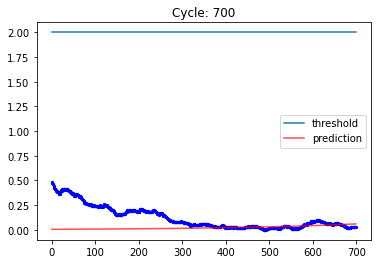

Explained variance of Pricincipal Component 1 is:0.9985299613526277
Explained variance of Pricincipal Component 1 is:0.9985212818932391
failed at2345.7229794933573


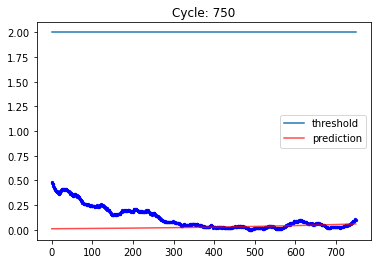

Explained variance of Pricincipal Component 1 is:0.9985151196500143
Explained variance of Pricincipal Component 1 is:0.9985018090272343
failed at2120.045096405666


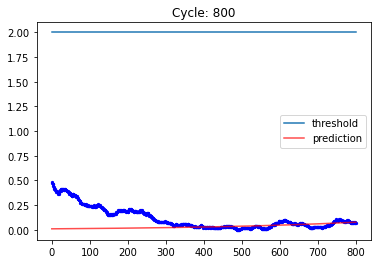

Explained variance of Pricincipal Component 1 is:0.9985041880601269
Explained variance of Pricincipal Component 1 is:0.9985179112332417
failed at29521.88282810128


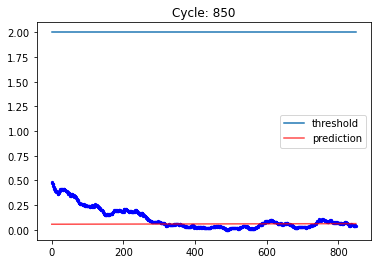

Explained variance of Pricincipal Component 1 is:0.9985370481496408
Explained variance of Pricincipal Component 1 is:0.9985439756496606
failed at19578.565517423667


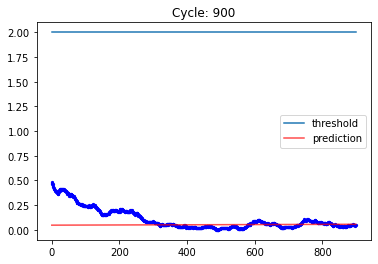

Explained variance of Pricincipal Component 1 is:0.9984619732856258
Explained variance of Pricincipal Component 1 is:0.9983695923186616
failed at5131993673.371621


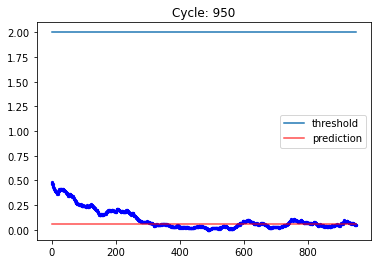

Explained variance of Pricincipal Component 1 is:0.998378981975746
Explained variance of Pricincipal Component 1 is:0.9983894631676571
failed at329035793623.7081


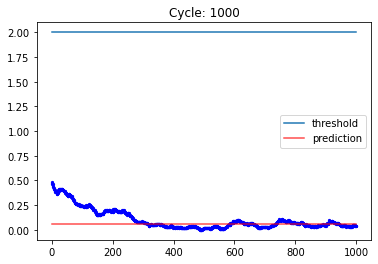

Explained variance of Pricincipal Component 1 is:0.998403136329191
Explained variance of Pricincipal Component 1 is:0.998383097290562
failed at249804830607.86273


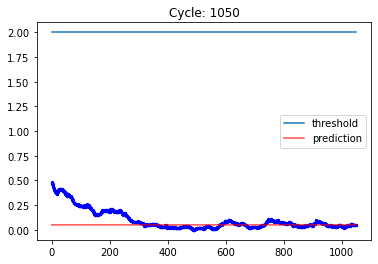

Explained variance of Pricincipal Component 1 is:0.9983025005387368
Explained variance of Pricincipal Component 1 is:0.9982825968093931
failed at5592.1380955934565


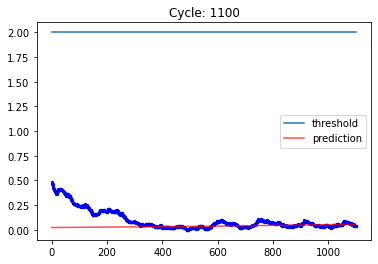

Explained variance of Pricincipal Component 1 is:0.998283092350983
Explained variance of Pricincipal Component 1 is:0.9982751162077269
failed at68445438086.44913


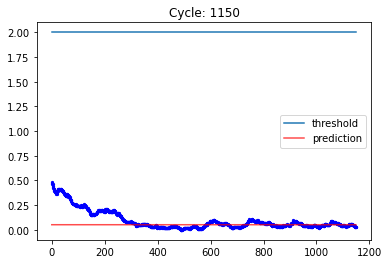

Explained variance of Pricincipal Component 1 is:0.998290426901311
Explained variance of Pricincipal Component 1 is:0.9982948367025781
failed at120439656769.38992


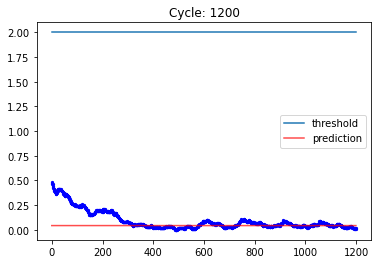

Explained variance of Pricincipal Component 1 is:0.9983156260544217
Explained variance of Pricincipal Component 1 is:0.9983323292295739
failed at5867609492662.577


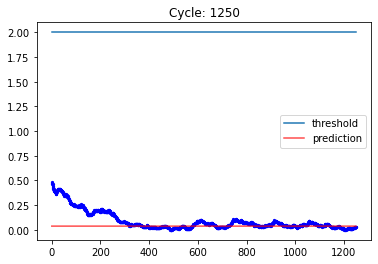

Explained variance of Pricincipal Component 1 is:0.9983405049736447
Explained variance of Pricincipal Component 1 is:0.9983256509460333
failed at170509900618.30936


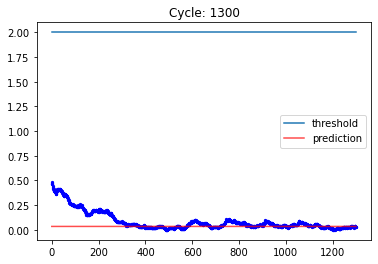

Explained variance of Pricincipal Component 1 is:0.9983113258288153
Explained variance of Pricincipal Component 1 is:0.9982834273415679
failed at193635234142.1925


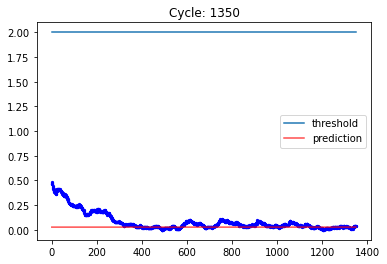

Explained variance of Pricincipal Component 1 is:0.9982598265786617
Explained variance of Pricincipal Component 1 is:0.9982232878912495
failed at1677.9606036553635


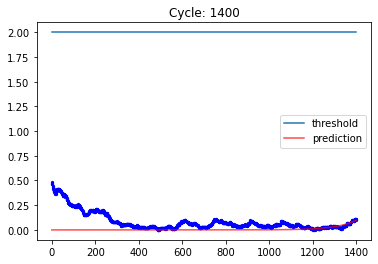

Explained variance of Pricincipal Component 1 is:0.9981906091349483
Explained variance of Pricincipal Component 1 is:0.9981814517076765
failed at1765.5016640359954


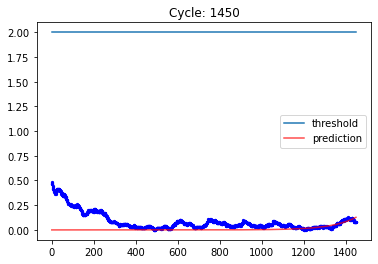

Explained variance of Pricincipal Component 1 is:0.9981260905459525
Explained variance of Pricincipal Component 1 is:0.9980558396987859
failed at2008.7962044755802


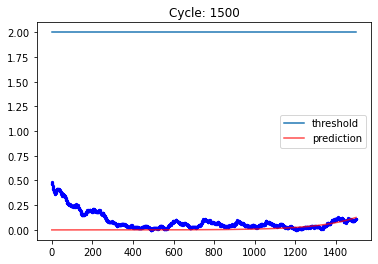

Explained variance of Pricincipal Component 1 is:0.9980129263608897
Explained variance of Pricincipal Component 1 is:0.9979875895433081
failed at2261.286279920495


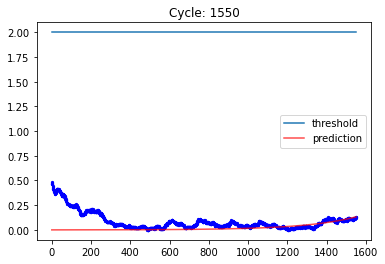

Explained variance of Pricincipal Component 1 is:0.9979857181361643
Explained variance of Pricincipal Component 1 is:0.9979826688978691
failed at3544.8570005482643


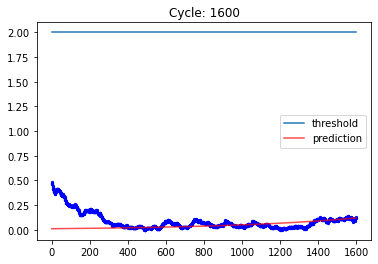

Explained variance of Pricincipal Component 1 is:0.9979828478674162
Explained variance of Pricincipal Component 1 is:0.9979700129177103
failed at220557649201.86224


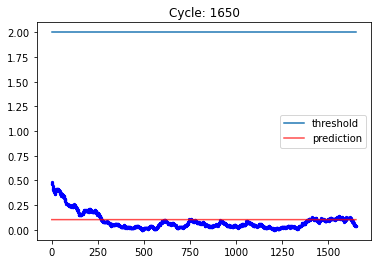

Explained variance of Pricincipal Component 1 is:0.9979795004831583
Explained variance of Pricincipal Component 1 is:0.9979884672251705
failed at154290567933.71408


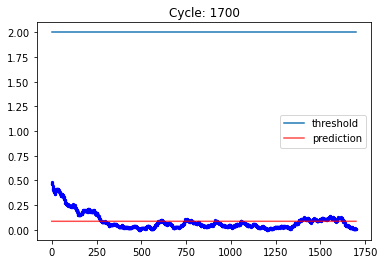

Explained variance of Pricincipal Component 1 is:0.9979888420711103
Explained variance of Pricincipal Component 1 is:0.9979695529535257
failed at105390389658.70522


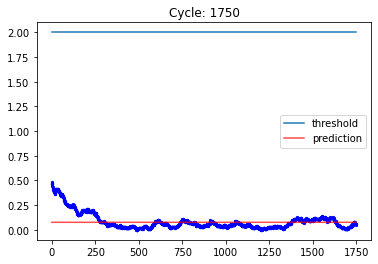

Explained variance of Pricincipal Component 1 is:0.9979694185825535
Explained variance of Pricincipal Component 1 is:0.9979421063550198
failed at171048072569.3783


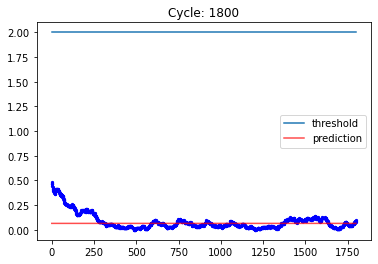

Explained variance of Pricincipal Component 1 is:0.9979383493950597
Explained variance of Pricincipal Component 1 is:0.9979364597056324
failed at3134.485447279732


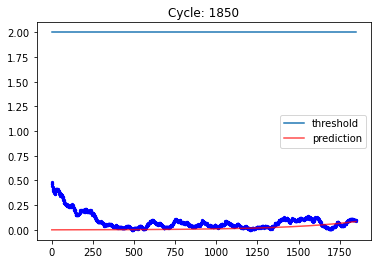

Explained variance of Pricincipal Component 1 is:0.9979199901434447
Explained variance of Pricincipal Component 1 is:0.9979094669871456
failed at2498.3705543488295


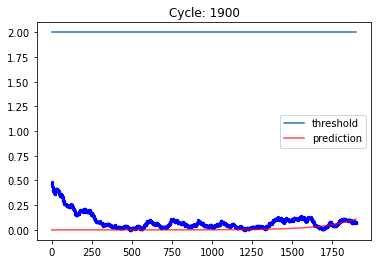

Explained variance of Pricincipal Component 1 is:0.9979159995200997
Explained variance of Pricincipal Component 1 is:0.9979251544407706
failed at434417811337.3815


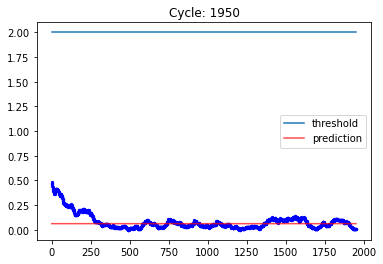

Explained variance of Pricincipal Component 1 is:0.9979543580660308
Explained variance of Pricincipal Component 1 is:0.9979683855879276
failed at103634969232.29622


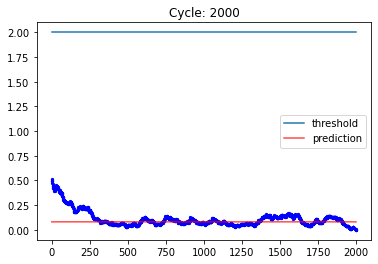

Explained variance of Pricincipal Component 1 is:0.9979644243770223
Explained variance of Pricincipal Component 1 is:0.9979707628584104
failed at5315599617075.989


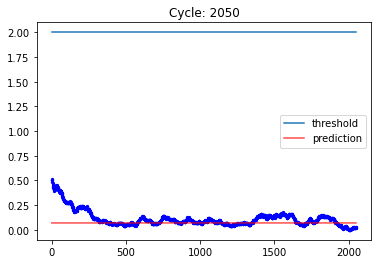

Explained variance of Pricincipal Component 1 is:0.9980045155864312
Explained variance of Pricincipal Component 1 is:0.9980319884974126
failed at212327045444.51215


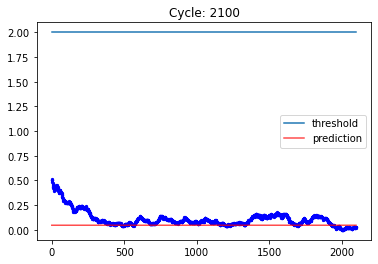

Explained variance of Pricincipal Component 1 is:0.9980427840793219
Explained variance of Pricincipal Component 1 is:0.9980585950709264
failed at314125344956.63617


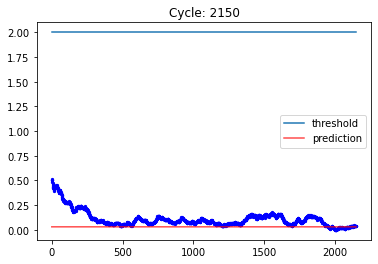

Explained variance of Pricincipal Component 1 is:0.9980735310501683
Explained variance of Pricincipal Component 1 is:0.9980946963035809
failed at5820.455170014102


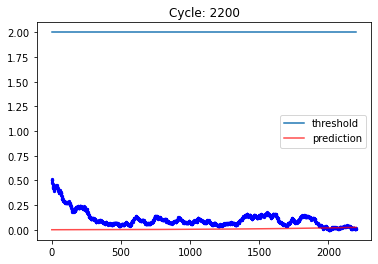

Explained variance of Pricincipal Component 1 is:0.9981053845623782
Explained variance of Pricincipal Component 1 is:0.9981377566338546
failed at342266039945.7333


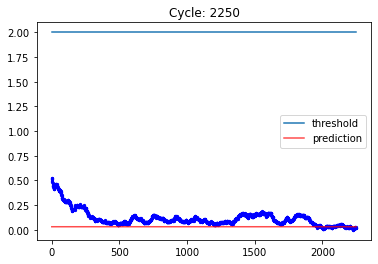

Explained variance of Pricincipal Component 1 is:0.9981708165630974
Explained variance of Pricincipal Component 1 is:0.9981989228659683
failed at150665164890.7513


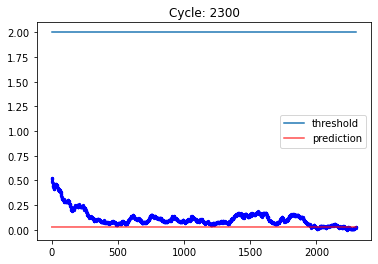

Explained variance of Pricincipal Component 1 is:0.9982197226360865
Explained variance of Pricincipal Component 1 is:0.9982504434733293
failed at1055649125733.9834


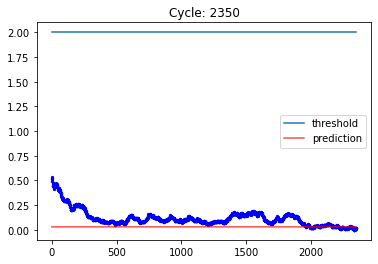

Explained variance of Pricincipal Component 1 is:0.9982798364017468
Explained variance of Pricincipal Component 1 is:0.9983015326881602
failed at311264444659.1438


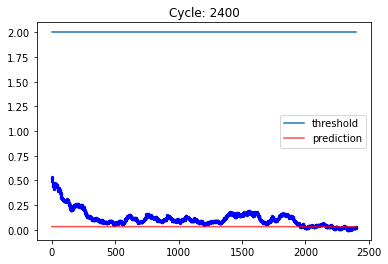

Explained variance of Pricincipal Component 1 is:0.9983202207599572
Explained variance of Pricincipal Component 1 is:0.9983063286739927
failed at386033052995.7499


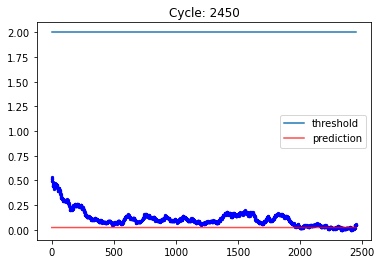

Explained variance of Pricincipal Component 1 is:0.9982839525474049
Explained variance of Pricincipal Component 1 is:0.9982940973475712
failed at3122.093973691818


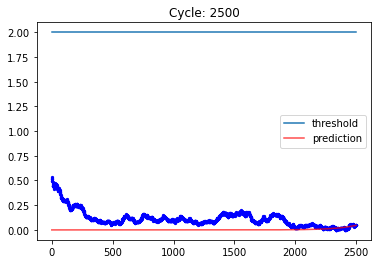

Explained variance of Pricincipal Component 1 is:0.9982865440654825
Explained variance of Pricincipal Component 1 is:0.9982822560521394
failed at3038.2523457855023


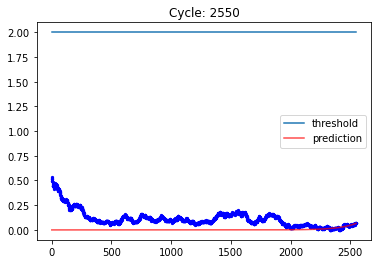

Explained variance of Pricincipal Component 1 is:0.9982775848644302
Explained variance of Pricincipal Component 1 is:0.9982767708430078
failed at2861.7904705361548


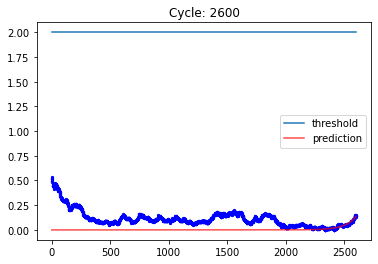

Explained variance of Pricincipal Component 1 is:0.9982735453839339
Explained variance of Pricincipal Component 1 is:0.9982415367030257
failed at3169.16873427111


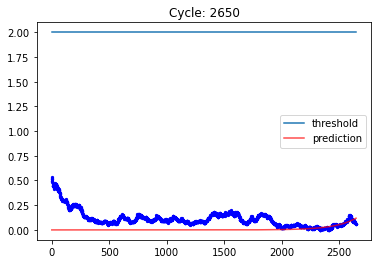

Explained variance of Pricincipal Component 1 is:0.9982305107783083
Explained variance of Pricincipal Component 1 is:0.9982204494659217
failed at4903.327531639483


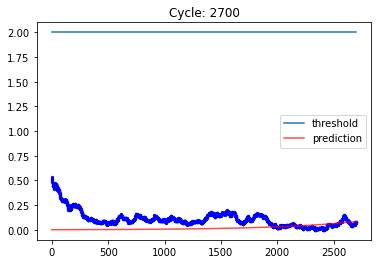

Explained variance of Pricincipal Component 1 is:0.9982190984286288
Explained variance of Pricincipal Component 1 is:0.998210996856414
failed at11610.915257852495


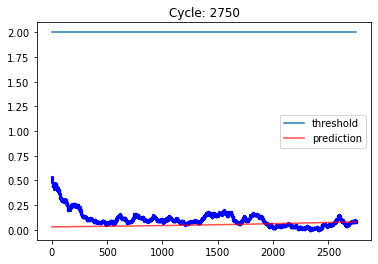

Explained variance of Pricincipal Component 1 is:0.9982167285772916
Explained variance of Pricincipal Component 1 is:0.9981992652593058
failed at1867323168260.6853


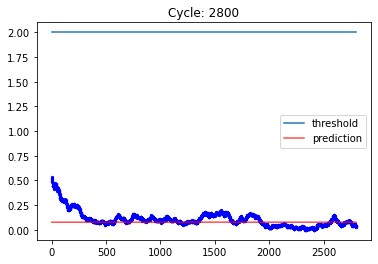

Explained variance of Pricincipal Component 1 is:0.9981876410712136
Explained variance of Pricincipal Component 1 is:0.998183532038386
failed at581525649250.9441


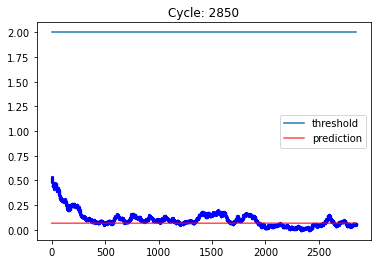

Explained variance of Pricincipal Component 1 is:0.9981798671328684
Explained variance of Pricincipal Component 1 is:0.9981810883444016
failed at11362.702013085527


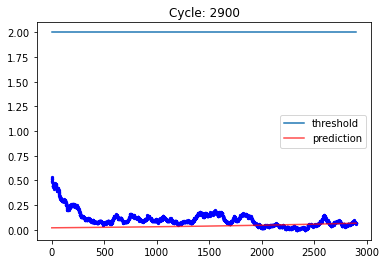

Explained variance of Pricincipal Component 1 is:0.9981867253983263
Explained variance of Pricincipal Component 1 is:0.9981889176075168
failed at134687210052.18443


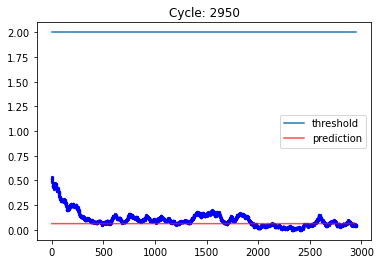

Explained variance of Pricincipal Component 1 is:0.9981892395038611
Explained variance of Pricincipal Component 1 is:0.9981763299654005
failed at4751.0991994705355


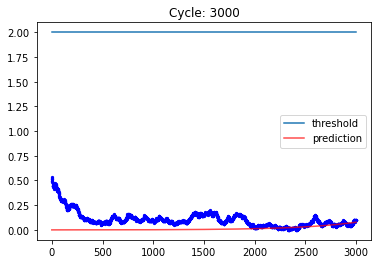

Explained variance of Pricincipal Component 1 is:0.9981729402751452
Explained variance of Pricincipal Component 1 is:0.9981687804454991
failed at4307.516478439565


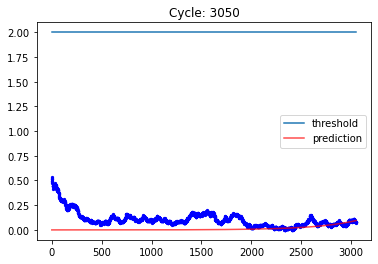

Explained variance of Pricincipal Component 1 is:0.9981696653093133
Explained variance of Pricincipal Component 1 is:0.9981630856278251
failed at5394.2961720026415


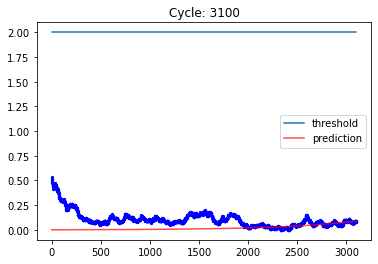

Explained variance of Pricincipal Component 1 is:0.9981581273988828
Explained variance of Pricincipal Component 1 is:0.9981554034880221
failed at4283.320629298784


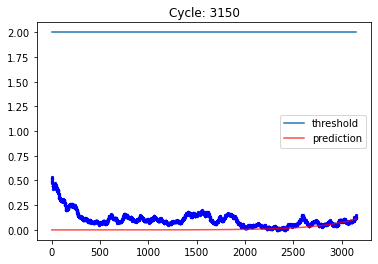

Explained variance of Pricincipal Component 1 is:0.9981525842790906
Explained variance of Pricincipal Component 1 is:0.9981468565395406
failed at5437.347176374926


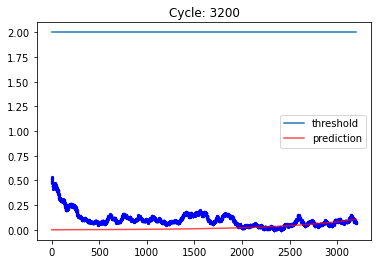

Explained variance of Pricincipal Component 1 is:0.9981467275388225
Explained variance of Pricincipal Component 1 is:0.9981482405449413
failed at368082733624.7881


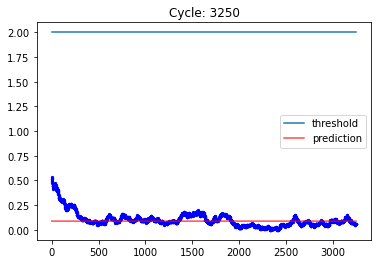

Explained variance of Pricincipal Component 1 is:0.9981484085032578
Explained variance of Pricincipal Component 1 is:0.998142389920064
failed at89098.15915395814


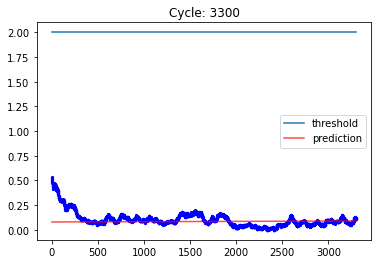

Explained variance of Pricincipal Component 1 is:0.9981320337116932
Explained variance of Pricincipal Component 1 is:0.9981207916903552
failed at6176.528456672966


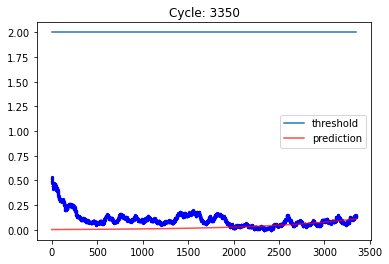

Explained variance of Pricincipal Component 1 is:0.9981175131652231
Explained variance of Pricincipal Component 1 is:0.998129168151602
failed at4010.4034506813814


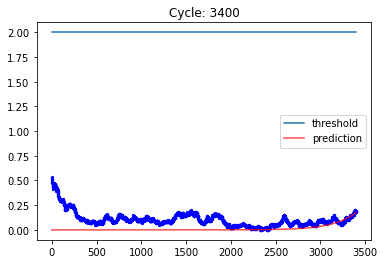

Explained variance of Pricincipal Component 1 is:0.9981252193666027
Explained variance of Pricincipal Component 1 is:0.99811891772495
failed at4028.594305552383


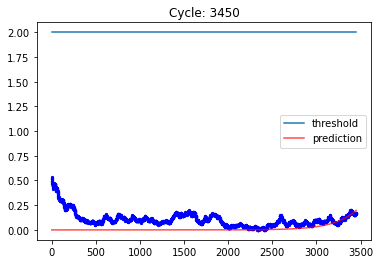

Explained variance of Pricincipal Component 1 is:0.9981152406552669
Explained variance of Pricincipal Component 1 is:0.99810097697282
failed at4230.226464017429


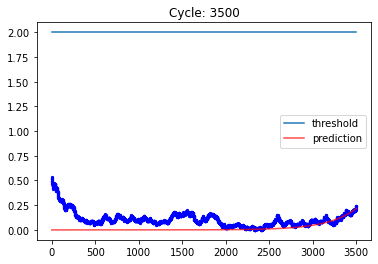

Explained variance of Pricincipal Component 1 is:0.9980147743893798
Explained variance of Pricincipal Component 1 is:0.9980338436177472
failed at4443.251350043873


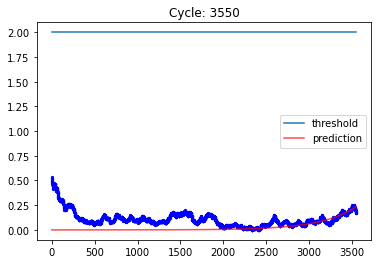

Explained variance of Pricincipal Component 1 is:0.9980385098495678
Explained variance of Pricincipal Component 1 is:0.9980395320659508
failed at10999.282606451296


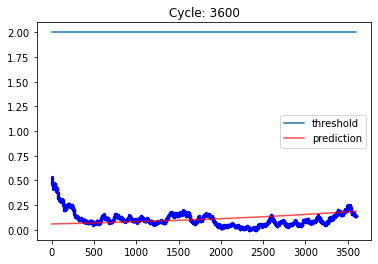

Explained variance of Pricincipal Component 1 is:0.9980379850798664
Explained variance of Pricincipal Component 1 is:0.9980367138379699
failed at382243998691.9436


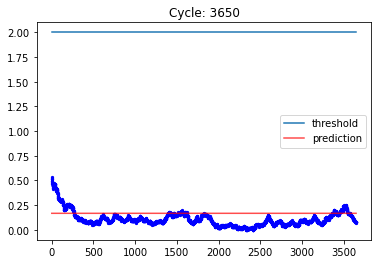

Explained variance of Pricincipal Component 1 is:0.9980279648804611
Explained variance of Pricincipal Component 1 is:0.9980250789906991
failed at142893599224.08264


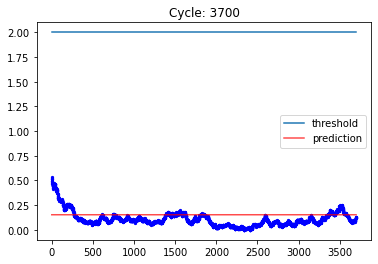

Explained variance of Pricincipal Component 1 is:0.9980232962876125
Explained variance of Pricincipal Component 1 is:0.9980048572982747
failed at75225620401.97339


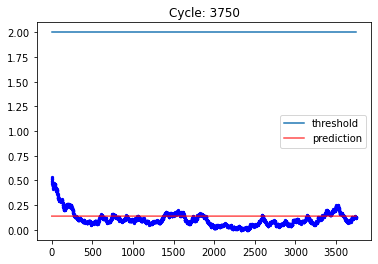

Explained variance of Pricincipal Component 1 is:0.9979989406038393
Explained variance of Pricincipal Component 1 is:0.997998301068053
failed at16269459451.35612


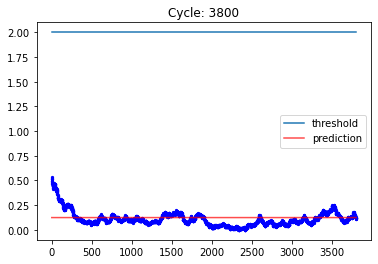

Explained variance of Pricincipal Component 1 is:0.9979971756937407
Explained variance of Pricincipal Component 1 is:0.9979958320754951
failed at6647.42379012006


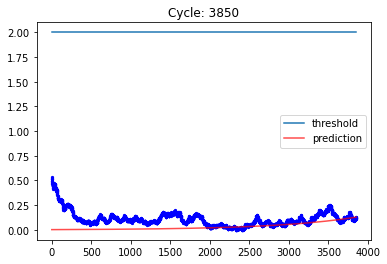

Explained variance of Pricincipal Component 1 is:0.9979938784608311
Explained variance of Pricincipal Component 1 is:0.9979933875083609
failed at7722.901040176032


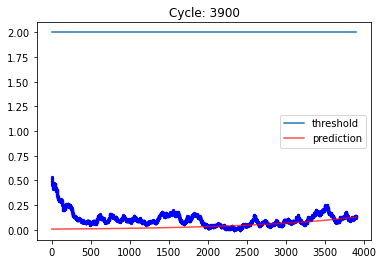

Explained variance of Pricincipal Component 1 is:0.9979868885869629
Explained variance of Pricincipal Component 1 is:0.997982113822044
failed at744848261431.8481


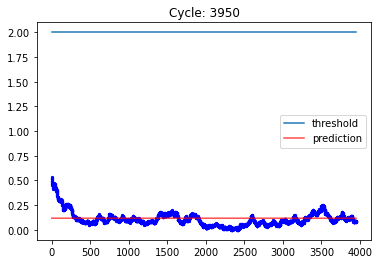

Explained variance of Pricincipal Component 1 is:0.9979779950124371
Explained variance of Pricincipal Component 1 is:0.9979762608785098
failed at434563890311.5619


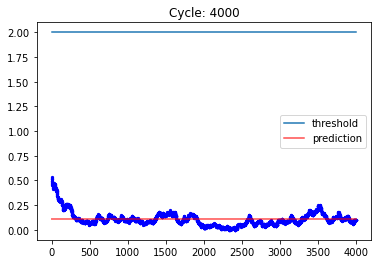

Explained variance of Pricincipal Component 1 is:0.9979751735286418
Explained variance of Pricincipal Component 1 is:0.9979723867460312
failed at370957987642.4681


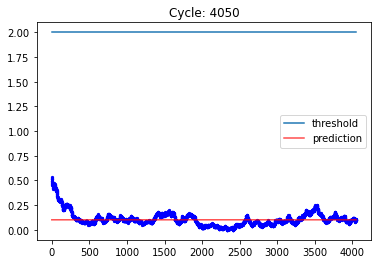

Explained variance of Pricincipal Component 1 is:0.9979704682689946
Explained variance of Pricincipal Component 1 is:0.9979735916237594
failed at37172923832.920525


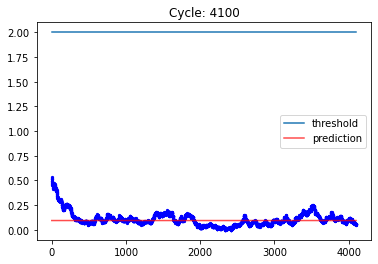

Explained variance of Pricincipal Component 1 is:0.9979781000787943
Explained variance of Pricincipal Component 1 is:0.9979752017047245
failed at141785086908.73654


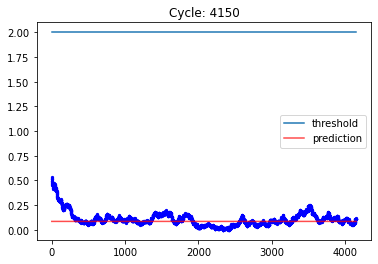

Explained variance of Pricincipal Component 1 is:0.9979703934484457
Explained variance of Pricincipal Component 1 is:0.9979701653255845
failed at941272727525.3685


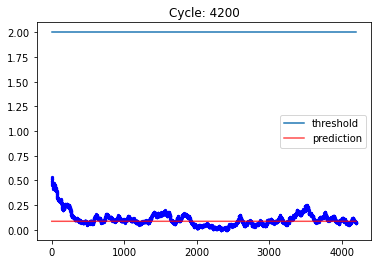

Explained variance of Pricincipal Component 1 is:0.9979738721935572
Explained variance of Pricincipal Component 1 is:0.9979741697578358
failed at88765459015.76683


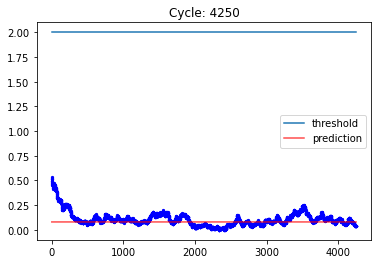

Explained variance of Pricincipal Component 1 is:0.9979647940283305
Explained variance of Pricincipal Component 1 is:0.9979628109618537
failed at56180548418.03544


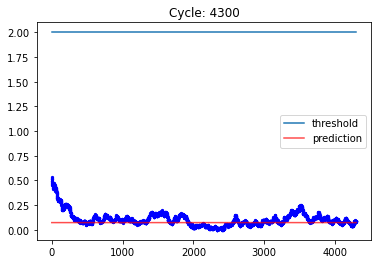

Explained variance of Pricincipal Component 1 is:0.9979599191051154
Explained variance of Pricincipal Component 1 is:0.9979626444567825
failed at5417.8836811077235


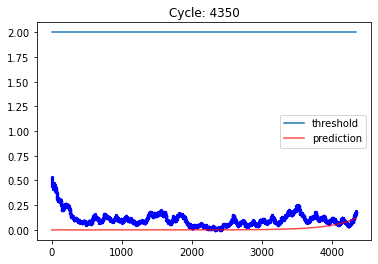

Explained variance of Pricincipal Component 1 is:0.9979633916236155
Explained variance of Pricincipal Component 1 is:0.997970553320272
failed at4855.409044250677


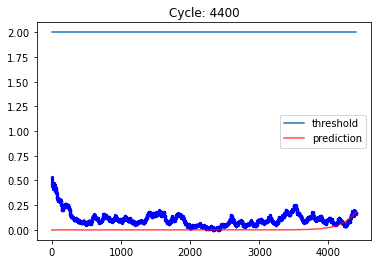

Explained variance of Pricincipal Component 1 is:0.9979761274549624
Explained variance of Pricincipal Component 1 is:0.9979647667411833
failed at4845.736601195487


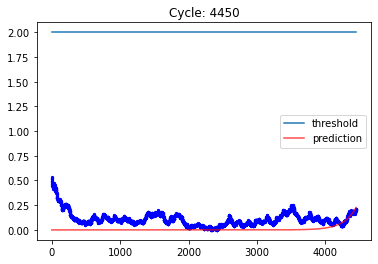

Explained variance of Pricincipal Component 1 is:0.997936760600101
Explained variance of Pricincipal Component 1 is:0.9978886469807074
failed at4971.212553577869


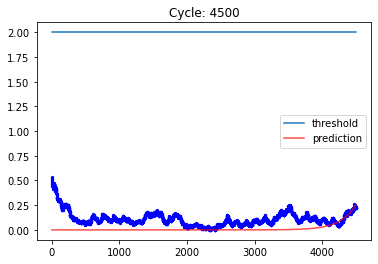

Explained variance of Pricincipal Component 1 is:0.9979103808463022
Explained variance of Pricincipal Component 1 is:0.9979188907565936
failed at5584.308550465834


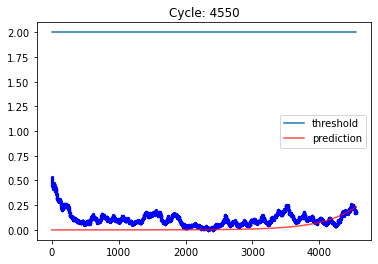

Explained variance of Pricincipal Component 1 is:0.9979227332771499
Explained variance of Pricincipal Component 1 is:0.9979174267319649
failed at15871.367907174441


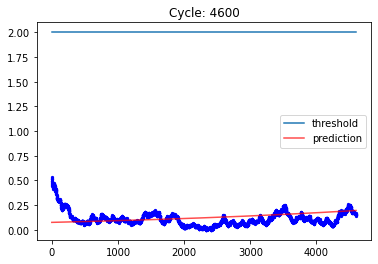

Explained variance of Pricincipal Component 1 is:0.9979105167918587
Explained variance of Pricincipal Component 1 is:0.9979051151526639
failed at177811288001.017


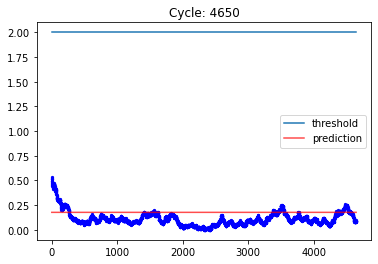

Explained variance of Pricincipal Component 1 is:0.9979049193182097
Explained variance of Pricincipal Component 1 is:0.9979062775992315
failed at205061199956.96182


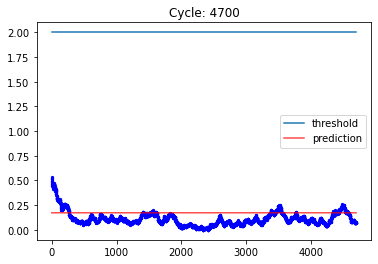

Explained variance of Pricincipal Component 1 is:0.9979006544714507
Explained variance of Pricincipal Component 1 is:0.9978932634005492
failed at129987203984.69112


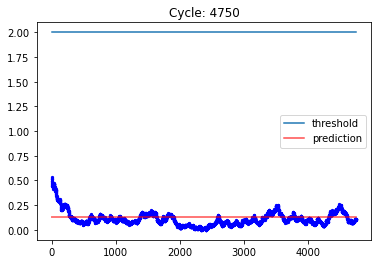

Explained variance of Pricincipal Component 1 is:0.9978691779957509
Explained variance of Pricincipal Component 1 is:0.9978271252537377
failed at159222133714.97226


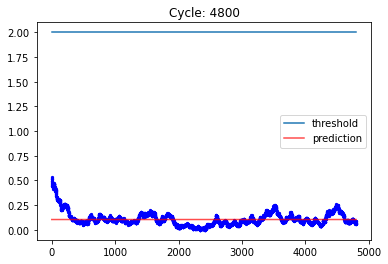

Explained variance of Pricincipal Component 1 is:0.9978196796859259
Explained variance of Pricincipal Component 1 is:0.9978056274457145
failed at6478.715055092628


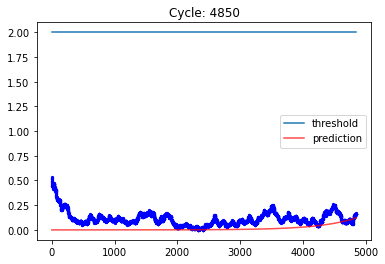

Explained variance of Pricincipal Component 1 is:0.9978024587066833
Explained variance of Pricincipal Component 1 is:0.997800816763165
failed at5715.095284716272


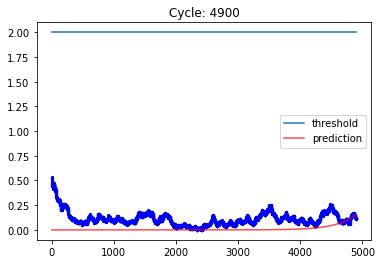

Explained variance of Pricincipal Component 1 is:0.997793831039649
Explained variance of Pricincipal Component 1 is:0.9977708993635827
failed at6541.579616826299


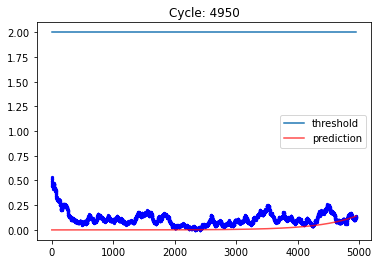

Explained variance of Pricincipal Component 1 is:0.9977656365845549
Explained variance of Pricincipal Component 1 is:0.9977805936226725
failed at5970.278603064845


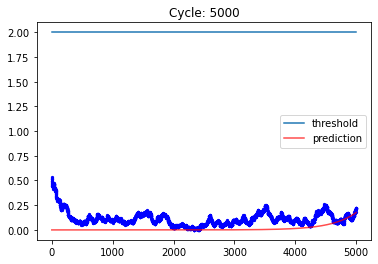

Explained variance of Pricincipal Component 1 is:0.9977931648148561
Explained variance of Pricincipal Component 1 is:0.9977942510716603
failed at6544.7338972060825


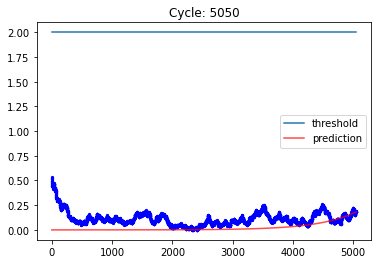

Explained variance of Pricincipal Component 1 is:0.9977850140200402
Explained variance of Pricincipal Component 1 is:0.9977735290174778
failed at6023.914287174084


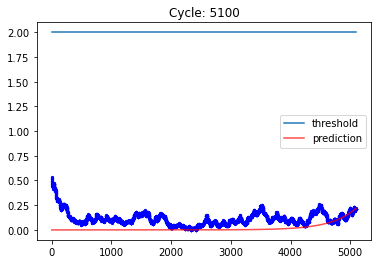

Explained variance of Pricincipal Component 1 is:0.997769564871969
Explained variance of Pricincipal Component 1 is:0.9977404813506777
failed at6181.7137360117595


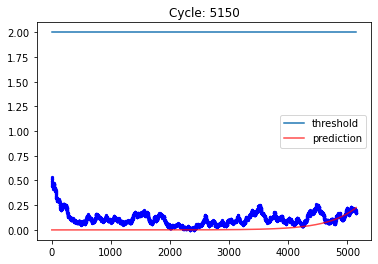

Explained variance of Pricincipal Component 1 is:0.9977265968587238
Explained variance of Pricincipal Component 1 is:0.997728240460442
failed at38793.99803045327


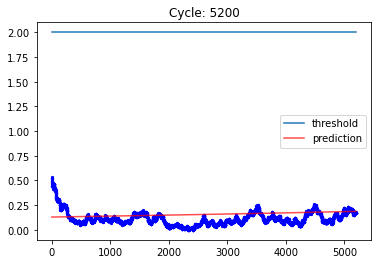

Explained variance of Pricincipal Component 1 is:0.9977255849861543
Explained variance of Pricincipal Component 1 is:0.9977341775310039
failed at29584.81458973635


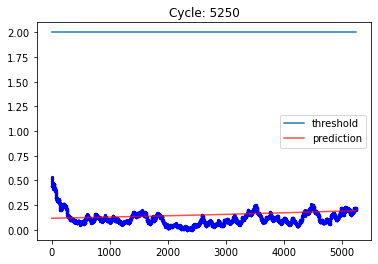

Explained variance of Pricincipal Component 1 is:0.9977396014728235
Explained variance of Pricincipal Component 1 is:0.9977223570517406
failed at12361.170112426851


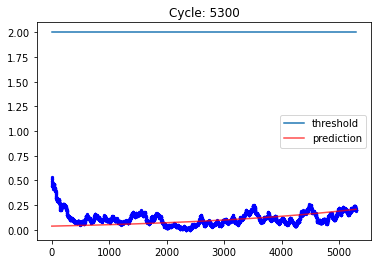

Explained variance of Pricincipal Component 1 is:0.9977311520860577
Explained variance of Pricincipal Component 1 is:0.9977419825834167
failed at8731.64883227847


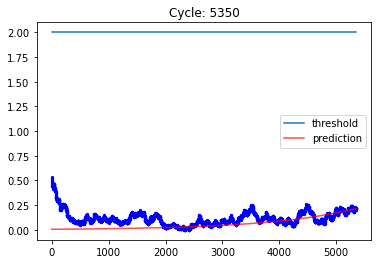

Explained variance of Pricincipal Component 1 is:0.9977617578392669
Explained variance of Pricincipal Component 1 is:0.9977788601150466
failed at7606.225498891904


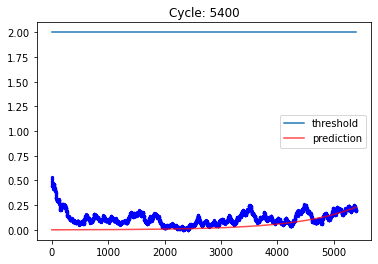

Explained variance of Pricincipal Component 1 is:0.997774195137301
Explained variance of Pricincipal Component 1 is:0.9977731041328658
failed at30585.28810077202


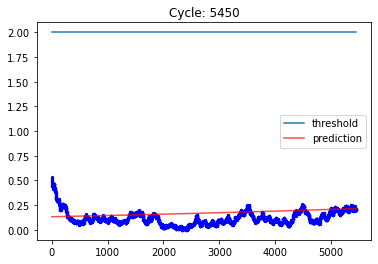

Explained variance of Pricincipal Component 1 is:0.9977845734298494
Explained variance of Pricincipal Component 1 is:0.9978043301434982
failed at16816.305270177287


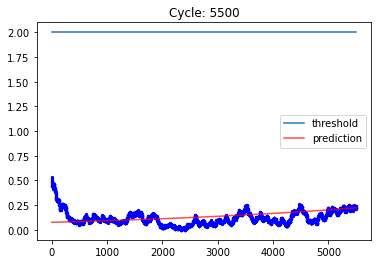

Explained variance of Pricincipal Component 1 is:0.9978142753158676
Explained variance of Pricincipal Component 1 is:0.9978215174602795
failed at17581.806669454316


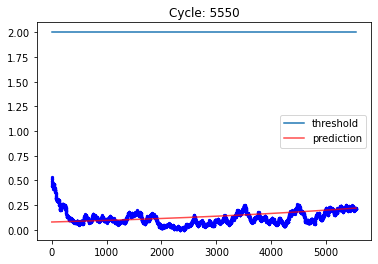

Explained variance of Pricincipal Component 1 is:0.9978041540899374
Explained variance of Pricincipal Component 1 is:0.9978080237071267
failed at140747941744.73926


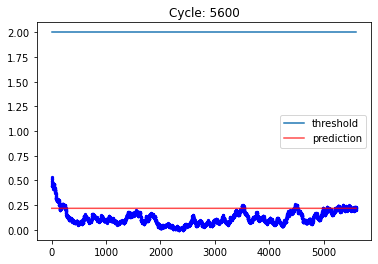

Explained variance of Pricincipal Component 1 is:0.9978121251435824
Explained variance of Pricincipal Component 1 is:0.9978178615098112
failed at6956760061873.071


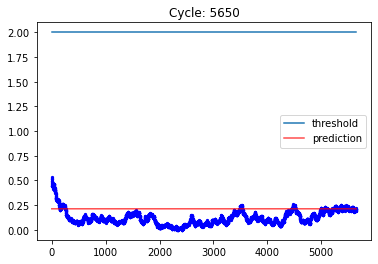

Explained variance of Pricincipal Component 1 is:0.9978226932787758
Explained variance of Pricincipal Component 1 is:0.9978344699573248
failed at59417288498.98579


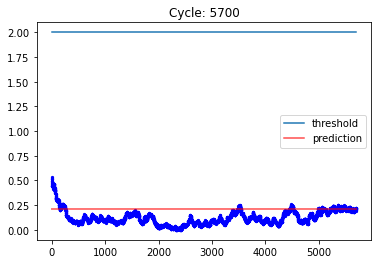

Explained variance of Pricincipal Component 1 is:0.997829551762307
Explained variance of Pricincipal Component 1 is:0.9978334142392229
failed at158010113636.87213


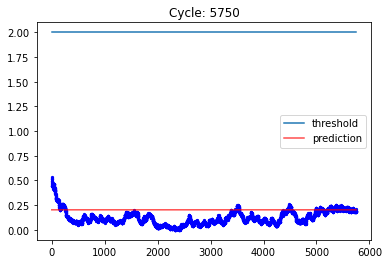

Explained variance of Pricincipal Component 1 is:0.9978248049968979
Explained variance of Pricincipal Component 1 is:0.9978087085329069
failed at218948458730.4244


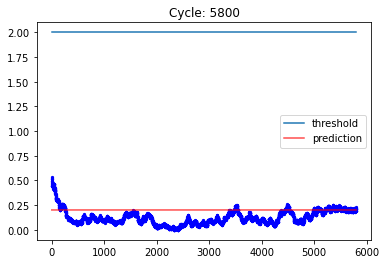

Explained variance of Pricincipal Component 1 is:0.9978180696011559
Explained variance of Pricincipal Component 1 is:0.9978219938479587
failed at17926.340783703312


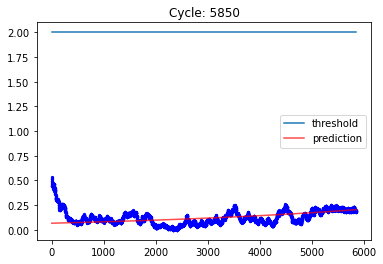

Explained variance of Pricincipal Component 1 is:0.9978264275654037
Explained variance of Pricincipal Component 1 is:0.9978261963090808
failed at215436323579.8612


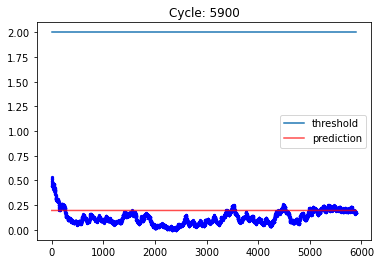

Explained variance of Pricincipal Component 1 is:0.9978216877995844
Explained variance of Pricincipal Component 1 is:0.997799991485968
failed at31028947136.043938


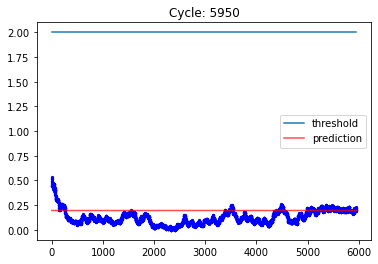

Explained variance of Pricincipal Component 1 is:0.9977918020711217
Explained variance of Pricincipal Component 1 is:0.9978444091425719
failed at7932.9500882115035


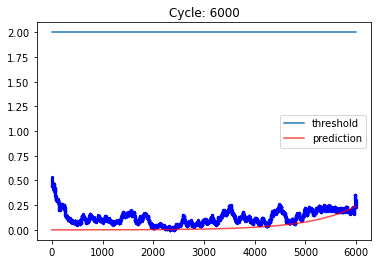

Explained variance of Pricincipal Component 1 is:0.997837023708102
Explained variance of Pricincipal Component 1 is:0.9978303966931149
failed at9323.16890261518


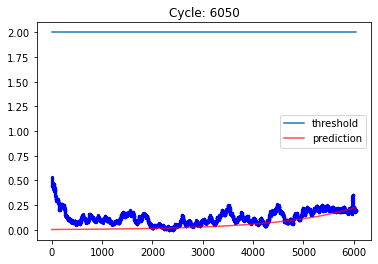

Explained variance of Pricincipal Component 1 is:0.9978125825820866
Explained variance of Pricincipal Component 1 is:0.9978077673184573
failed at11560.727687385683


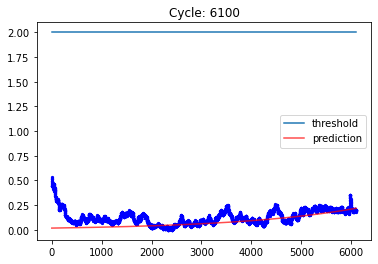

Explained variance of Pricincipal Component 1 is:0.997798678502249
Explained variance of Pricincipal Component 1 is:0.9977824819904091
failed at45745404703.242256


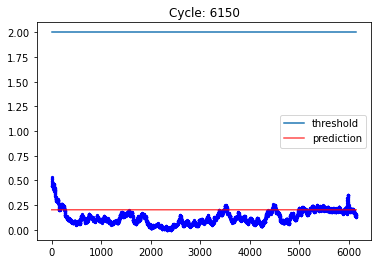

Explained variance of Pricincipal Component 1 is:0.9977671888357472
Explained variance of Pricincipal Component 1 is:0.9977360129802332
failed at1826244845701.2166


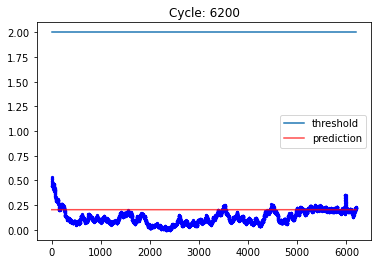

Explained variance of Pricincipal Component 1 is:0.9977350379196919
Explained variance of Pricincipal Component 1 is:0.9977634977403784
failed at7429.687822662916


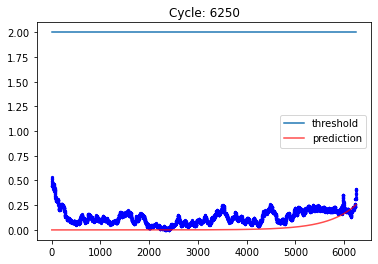

Explained variance of Pricincipal Component 1 is:0.9979314386884112
Explained variance of Pricincipal Component 1 is:0.9981951087184675
failed at6433.227966795896


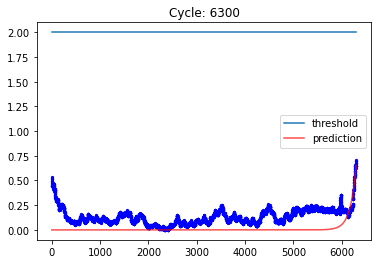

In [7]:
log = [[],[]]
#run this again, again to simulate life-cycle of a bearing
while prediction_cycle<len(set2)+1:
    data = set2[B_x][:prediction_cycle]
    degredation = health_indicator(data,use_filter=True)
    fit = fit_exp(degredation,base=250)

    prediction = predict(degredation,fit)
    m,n = fit[0]
    thres = 2
    fail_cycle = (np.log(thres/m))/abs(n)
    log[0].append(prediction_cycle)
    log[1].append(fail_cycle)

    if prediction_cycle % 50 == 0:
        #print(m,n)
        print('failed at'+str(fail_cycle))

        fig =plt.figure()
        ax =fig.subplots()
        ax.plot([0,prediction_cycle],[2,2])
        ax.set_title('Cycle: '+str(prediction_cycle))
        ax.scatter(degredation['cycle'],degredation['PC1'],color='b',s=5)
        ax.plot(degredation['cycle'],prediction,color='r',alpha=0.7)
        ax.legend(['threshold','prediction'])
        plt.show()
    increment_cycle = 25
    prediction_cycle += increment_cycle

In [8]:
#True labels represent alerts which are given before real end cycle!
d = {'time':set2['time'][init_cycle::increment_cycle],'cycle': log[0], 'prediction': (np.array(log[1]))}
df = pd.DataFrame(data=d)
df['is valid'] = df['prediction']<984
df.head(30)

,time,cycle,prediction,is valid
550,2004-03-08 05:02:46,550,7.655161e+11,False
575,2004-03-08 09:12:46,575,1.345436e+11,False
600,2004-03-08 13:22:46,600,3.012809e+09,False
625,2004-03-08 17:32:46,625,9.794987e+02,True
650,2004-03-08 21:42:46,650,1.072057e+03,False
675,2004-03-09 01:52:46,675,1.221051e+03,False
700,2004-03-09 06:02:46,700,1.746295e+03,False
725,2004-03-09 10:12:46,725,2.311840e+03,False
750,2004-03-09 14:22:46,750,2.345723e+03,False
775,2004-03-09 18:32:46,775,2.001946e+03,False
